In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prmlrelated/Screen Shot 2022-01-16 at 20.26.26.png


### outline

- overview of 'kernel'

- dual representations <- non-probabilistic model for regression

- how to construct kernel?

- GP <- probabilisic discriminative model (Bayesian setting)

- RECALL

- SUPPLEMENTS

- ref

**terminology**

- generative model

a class of statistical models that can generate new data instances

generative models try to model how data is placed throughout the space

a generative model focuses on explaining how the data was generated

by $\max p(X,Y)$

- discriminative model 

mainly used for supervised machine learning

also known as conditional models since they learn the boundaries between classes or labels in a dataset

discriminative models draw boundaries in the data space

focuses on predicting the labels of the data

by $\max p(Y|X)$

- hidden markov model

- parametric / non-parametric generative model

a generative model $p(X)$

a parametric generative model $p(X|\theta)$


# overview

#### memory-based methods

storing the entire training set in order to make predictions for future data points

typically require a metric to be defined that measures the similarity of any two vectors in input space

fast to 'train' but slow at making predictions for test data points

- Parzen probability density model

a linear combination of 'kernel' functions each one centered on one of the training data points

- Nearest Neighbors

assine to each new test vector the same label as the closest example from the training set

#### dual representation (of linear parametric models)

the predictions are also based on **linear combinations of a kernel function evaluated at the training data points**

$k(\textbf{x},\textbf{x'})=\phi(\textbf{x})^T\phi(\textbf{x'})$

**linear kernel**

$\phi(\textbf{x})=\textbf{x}$

$k(\textbf{x},\textbf{x'})=\textbf{x}^T\textbf{x'}$

#### kernel trick/substitution

a kernel - an inner product in a feature space

if we have an alg that the input vector $\textbf{x}$ enters only in the form of scalar product, then we can replace the scalar product with some other choice of kernel

- nonlinear PCA / nearest neighbour classifiers / the kernel Fisher discriminant

#### stationary kernels

invariant to translations in input space

$k(\textbf{x},\textbf{x'})=k(\textbf{x}-\textbf{x'})$

#### homogeneous kernels / radial basis functions

depend only on the magnitude of the distance between the arguments

$k(\textbf{x},\textbf{x'})=k(||\textbf{x}-\textbf{x'}||)$



# dual representations

let's consider a linear regression model with regularization

$J(\textbf{w})=1/2 \sum_{n=1}^N \{\textbf{w}^T\phi(\textbf{x}_n)-t_n\}^2+\lambda/2 \textbf{w}^T\textbf{w}$

take the derivative $J(\textbf{w})$ w.r.t $\textbf{w}$ =0, we have

$\textbf{w}=-1/\lambda \sum_{n=1}^N \{\textbf{w}^T\phi(\textbf{x}_n)-t_n\}\phi(\textbf{x}_n)=\sum_{n=1}^N a_n\phi(\textbf{x}_n)=\boldsymbol{\Phi}^T\textbf{a}$

$\boldsymbol{\Phi}=$
$\begin{pmatrix}
\phi_0(x_1) & \phi_1(x_1) & ... & \phi_{M-1}(x_1)\\
\phi_0(x_2) & \phi_1(x_2) & ... & \phi_{M-1}(x_2)\\
... & ... & ... & ...\\
\phi_0(x_N) & \phi_1(x_N) & ... & \phi_{M-1}(x_N)\\
\end{pmatrix}$

$\Phi$ <- design matrix, NxM, $\Phi_{nj}=\phi_j(x_n)$

$\textbf{a}=(a_1,...,a_N)^T$, where $a_n=(-1/\lambda) \{\textbf{w}^T\phi(\textbf{x}_n)-t_n\}$

insert $\textbf{w}=\boldsymbol{\Phi}^T\textbf{a}$ back to $J(\textbf{w})$

$J(\textbf{a})=1/2 \textbf{a}^T\boldsymbol{\Phi}\boldsymbol{\Phi}^T\boldsymbol{\Phi}\boldsymbol{\Phi}^T\textbf{a}-\textbf{a}^T\boldsymbol{\Phi}\boldsymbol{\Phi}^T\textbf{t}+1/2\textbf{t}^T\textbf{t}+\lambda/2\textbf{a}^T\boldsymbol{\Phi}\boldsymbol{\Phi}^T\textbf{a}$

$\textbf{t}=(t_1,...,t_N)^T$

we define Gram matrix

$\textbf{K}=\boldsymbol{\Phi}\boldsymbol{\Phi}^T$

$\textbf{K}$ <- NxN symmetric matrix 

with $\textbf{K}_{nm}=\phi(\textbf{x}_n)^T\phi(\textbf{x}_m)=k(\textbf{x}_n,\textbf{x}_m)$ <- kernel function

then 

$J(\textbf{a})=1/2 \textbf{a}^T\textbf{KK}\textbf{a}-\textbf{a}^T\textbf{K}\textbf{t}+1/2\textbf{t}^T\textbf{t}+\lambda/2\textbf{a}^T\textbf{K}\textbf{a}$

take the derivative $J(\textbf{a})$ w.r.t $\textbf{a}$ =0, we have

$\textbf{a}=(\textbf{K}+\lambda \textbf{I}_N)^{-1}\textbf{t}$

substitute this back to linear regression model

$y(\textbf{x})=\textbf{w}^T\phi(\textbf{x})=\textbf{a}^T\boldsymbol{\Phi}\phi(\textbf{x})=\textbf{k}(\textbf{x})^T(\textbf{K}+\lambda \textbf{I}_N)^{-1}\textbf{t}$ <- dual formulation

$\textbf{k}(\textbf{x})$ with $k_n(\textbf{x})=k(\textbf{x}_n,\textbf{x})$

in this formulation, we determine the parameter vector $\textbf{a}$ by inverting an NxN matrix

whereas, in $\textbf{w}$ space, we invert an MxM matrix to determine $\textbf{w}$

recall N - the dimension of input variable, M - the dimension of linear coefficients

**adv/disadv of dual representation**

(-) N is typically much larger than M

(+) however, we can directly work with kernels and avoid the explicit introduction of the feature vector $\phi(\textbf{x})$

(+) which allows implicit using of feature spaces of high, even infinite dimensionality



# constructing kernels

#### approach to construct kernels

- choose a feature space mapping 

in 1d input space:

$k(x,x')=\phi(x)^T\phi(x')=\sum_{i=1}^M\phi_i(x)\phi_i(x')$

- constuct kernel function directly

but, we have to ensure that the function we choose a valid kernel

this means, it corresponds to a scalar product in some (perhaps infinite dimension) feature space

a simple example, consider a kernel function

$k(\textbf{x},\textbf{z})=(\textbf{x}^T\textbf{z})^2$

if we take a 2d input $\textbf{x}=(x_1,x_2)$

$k(\textbf{x},\textbf{z})=(\textbf{x}^T\textbf{z})^2$

$=(x_1z_1+x_2z_2)^2$

$=x_1^2z_1^2+2x_1z_1x_2z_2+x_2^2z_2^2$

$=(x_1^2,\sqrt{2}x_1x_2,x_2^2)(z_1^2,\sqrt{2}z_1z_2,z_2^2)$

$=\phi(\textbf{x})^T\phi(\textbf{z})$

**a way to determine a valid kernel**

the Gram matrix $\textbf{K}$ with elements $k(\textbf{x}_n,\textbf{x}_m)$

should be **positive semidefinite** for all possible choices of the set $\{\textbf{x}_n\}$

- build new kernels out of simpler kernels as building blocks

given $k_1(\textbf{x},\textbf{x'}),k_2(\textbf{x},\textbf{x'})$

$k(\textbf{x},\textbf{x'})=ck_1(\textbf{x},\textbf{x'})$ <- $c \geq 0$ constant

omit $(\textbf{x},\textbf{x'})$ below

$k=f(\textbf{x})k_1f(\textbf{x'})$ <- $f$ any function

$k=q(k_1)$ <- $q$ polynomial with nonnegative coefficients

$k=\exp(k_1)$

$k=k_1+k_2$

$k=k_1k_2$

$k=k_3(\phi(\textbf{x}),\phi(\textbf{x'}))$ <- $\phi$ a function from $\textbf{x}$ to $\mathbb{R}^M$, $k_3$ is valid kernel in $\mathbb{R}^M$

$k=\textbf{x}^T\textbf{A}\textbf{x'}$ <- $A$ symmetric positive semidefinite matrix

$k=k_a(\textbf{x}_a,\textbf{x'}_a)+k_b(\textbf{x}_b,\textbf{x'}_b)$

$k=k_a(\textbf{x}_a,\textbf{x'}_a)k_b(\textbf{x}_b,\textbf{x'}_b)$ <- $\textbf{x}_a,\textbf{x}_b$ variables with $\textbf{x}=(\textbf{x}_a,\textbf{x}_b)$, $k_a,k_b$ valid kernels

**polynomial kernel**

$k(\textbf{x},\textbf{x'})=(\textbf{x}^T\textbf{x'})^2$ <- contains only terms of degree two

to generalize

$k(\textbf{x},\textbf{x'})=(\textbf{x}^T\textbf{x'}+c)^2$, with $c \geq 0$ <- the corresponding feature mapping contains constant, linear terms, terms of order two

$k(\textbf{x},\textbf{x'})=(\textbf{x}^T\textbf{x'})^M$ <- contains all monomials of order $M$

to generalize

$k(\textbf{x},\textbf{x'})=(\textbf{x}^T\textbf{x'}+c)^M$ <- valid because of the above properties

**Gaussian kernel**

$k(\textbf{x},\textbf{x'})=\exp (-||\textbf{x}-\textbf{x'}||^2/2\sigma^2)$

not interpreted as a probability density, so the normalization term is omitted

**kernel can be symbolic**

rather than simply vectors of real numbers

kernels can be graphs, sets, strings, text documents

- probabilistic generative model

apply generative models in a discriminative setting

**generative model** can deal with missing data and handle sequences of varying length

**discriminative model** gives better performance on discriminative tasks

to combine the above, use generative model to define a kernel, and use this kernel in a discriminative approach

e.g. given a generative model $p(x)$

we define a kernel $k(x,x')=p(x)p(x')$

it says that two inputs are similar if they both have high probabilities

then we can have $k(x,x')=\sum_i p(x|i)p(x'|i)p(i)$

$k(x,x')=\int p(x|z)p(x'|z)p(z) dz$ <- z is continuous latent variable

**Hidden Markov model** expresses the distribution $p(\textbf{X})$ as a marginalization over a corresponding sequence of hidden states $\textbf{Z}$

we can define a kernel measuring the similarity of two squences $\textbf{X},\textbf{X'}$

 $k(\textbf{X},\textbf{X'})=\sum_{\textbf{Z}} p(\textbf{X}|\textbf{Z})p(\textbf{X'}|\textbf{Z})p(\textbf{Z})$

**Fisher kernel**

consider a parametric generative model $p(\textbf{x}|\boldsymbol{\theta)}$

consider the Fisher score $g(\boldsymbol{\theta},\textbf{x})=\nabla_{\boldsymbol{\theta}} \ln p(\textbf{x}|\boldsymbol{\theta})$

then the Fisher kernel is defined by

$k(\textbf{x},\textbf{x'})=g(\boldsymbol{\theta},\textbf{x})^T\textbf{F}^{-1}g(\boldsymbol{\theta},\textbf{x'})$

$\textbf{F}$ - Fisher information matrix

$\textbf{F}=\mathbb{E}_{\textbf{x}}[g(\boldsymbol{\theta},\textbf{x})g(\boldsymbol{\theta},\textbf{x})^T]$

$\mathbb{E}$ w.r.t $p(\textbf{x}|\boldsymbol{\theta})$

note: the presence of the Fisher information matrix causes the kernel to be invariant under a nonlinear re-parameterization of the density model $\boldsymbol{\theta}$->$\psi(\boldsymbol{\theta})$

in practice, it is often infeasible to evaluate the Fisher information matrix

one approach is to use the sample average

$\textbf{F}\cong 1/N \sum_{n=1}^N g(\boldsymbol{\theta},\textbf{x})g(\boldsymbol{\theta},\textbf{x})^T$ <- covariance matrix of Fisher score

more simply, we can just omit the Fisher information matrix and use the noninvariant kernel

$k(\textbf{x},\textbf{x'})=g(\boldsymbol{\theta},\textbf{x})^Tg(\boldsymbol{\theta},\textbf{x'})$

**sigmoid kernel**

$k(\textbf{x},\textbf{x'})=\tanh(a \textbf{x}^T)\textbf{x'}+b$

**exponential kernel**

$k(\textbf{x},\textbf{x'})=\exp(-\theta |\textbf{x}-\textbf{x'}|)$

**radial basis function networks**

radial basis function (RBF): 

has the property that each basis function depends only on the radial distance from a center $\boldsymbol{\mu}_j$, so that

$\phi_j(\textbf{x})=h(||\textbf{x}-\boldsymbol{\mu}_j||)$

- **RBF was introduced for function interpolation**

given a set of input $\{x_1,...,x_N\}$ along with $\{t_1,...,t_N\}$

goal: is to find a smooth function $f(x)$ that fits every target value exactly

by $f(\textbf{x})=\sum_{n=1}^N w_nh(||\textbf{x}-\textbf{x}_n||)$

- expansions in rbf also arise from regularization theory

- interpolation problem when the input variables are noisy

- **normalized radial basis function** (nrbf) for kernel density estimation of regression

**Nadaraya-Watson model** later check

given training set $\{\textbf{x}_n,t_n \}$

use a Parzen density estimator to model the joint distribution $p(\textbf{x},t)$

# GP prml detail

kernel role in probabilistic discriminative models (Bayesian setting)

#### linear regression revisit

$y(\textbf{x})=\textbf{w}^T\phi(\textbf{x})$

$\textbf{x}$ - input vector

$\textbf{w}$ - M-dimensional weight vector

consider a prior over $\textbf{w}$ given by an **isotropic Gaussian** of the form

$p(\textbf{w})=\mathcal{N} (\textbf{w}|\textbf{0},\alpha^{-1}\textbf{I})$

for any given $\textbf{w}$, $y(\textbf{x})=\textbf{w}^T\phi(\textbf{x})$ is a particular function of $\textbf{x}$

so the probability distribution over $\textbf{w}$, the $p(\textbf{w})$ induces a probability distribution over function $y(\textbf{x})$

**in practice, we wish to evaluate this function at specific values of $\textbf{x}$, like $x_1,...,x_N$**

we therefore are interested in **the joint distribution of the function values $y(x_1),...,y(x_N)$**

denote $\textbf{y}$ with elements $y_n=y(\textbf{x}_n)$

we have

$\textbf{y}=\boldsymbol{\Phi}\textbf{w}$

recall $\boldsymbol{\Phi}$ is the design matrix with elements $\Phi_{nk}=\phi_k(\textbf{x}_n)$

note: $\textbf{y}$ is a linear combination of Gaussian distributed variables given by the elements of $\textbf{w}$, then $\textbf{y}$ is Gaussian

$\mathbb{E}[\textbf{y}]=\boldsymbol{\Phi}\mathbb{E}[\textbf{w}]=0$

$cov[\textbf{y}]=\mathbb{E}[\textbf{yy}^T]=\boldsymbol{\Phi}\mathbb{E}[\textbf{ww}^T]\boldsymbol{\Phi}^T=(1/\alpha) \boldsymbol{\Phi\Phi}^T=\textbf{K}$

$\textbf{K}$ the Gram matrix with elements $K_{nm}=k(\textbf{x}_n,\textbf{x}_m)=(1/\alpha) \phi(\textbf{x}_n)^T\phi(\textbf{x}_m)$ <- kernel function of a Gaussian process defined by linear regression with a weight prior

#### Gaussian Process

def: a probability distribution over functions $y(\textbf{x})$, such that the set of values of $y(\textbf{x})$ evaluated at an arbitrary set of points $x_1,...,x_N$, jointly have a Gaussian distribution

**Gaussian random field** - the input vector $\textbf{x}$ is 2d

**stochastic process $y(\textbf{x})$** - specified by giving the joint probability distribution for any finite set of values $y(x_1),...,y(x_N)$

**a key point of GP**

the joint distribution over $N$ variables $y(x_1),...,y(x_N)$ is specified completely by **the second-order statistics**, namely the mean and the covariance

in most applications, we will not have any prior knowledge about the mean of $y(\textbf{x})$, so by symmetry we take it to be zero

then only the covariance matters:

$\mathbb{E}[y(\textbf{x}_n)y(\textbf{x}_m)]=k(\textbf{x}_n,\textbf{x}_m)$

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv
from numpy.random import multivariate_normal, seed, randn, rand
from sklearn.preprocessing import PolynomialFeatures

np.set_printoptions(precision=3, suppress=True)
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

- shape of covariance matrix from Multivariate Gaussian

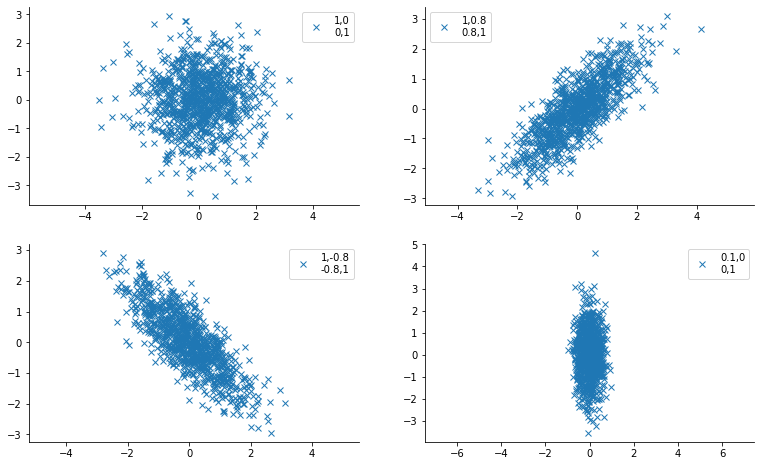

In [3]:
plt.figure(figsize=(13,8))
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance

plt.subplot(221)
x= np.random.multivariate_normal(mean, cov, 1000).T
plt.plot(x[0,:], x[1,:], 'x',label='1,0\n0,1')
plt.axis('equal')
plt.legend()

plt.subplot(222)
cov = [[1, 0.8], [0.8, 1]]  # diagonal covariance
x= np.random.multivariate_normal(mean, cov, 1000).T
plt.plot(x[0,:], x[1,:], 'x',label='1,0.8\n0.8,1')
plt.axis('equal')
plt.legend()


plt.subplot(223)
cov = [[1, -0.8], [-0.8, 1]]  # diagonal covariance
x= np.random.multivariate_normal(mean, cov, 1000).T
plt.plot(x[0,:], x[1,:], 'x',label='1,-0.8\n-0.8,1')
plt.axis('equal')
plt.legend()


plt.subplot(224)
cov = [[0.1, 0], [0, 1]]  # diagonal covariance
x= np.random.multivariate_normal(mean, cov, 1000).T
plt.plot(x[0,:], x[1,:], 'x',label='0.1,0\n0,1')
plt.axis('equal')
plt.legend()


mean 2x1 cov 2x2 generate 100 samples 

    np.random.multivariate_normal(mean, cov, 100).T
    
    gives 100x2 samples [:,0] for axis 0, [:,1] for axis 1 
    
mean 3x1 cov 3x3 generate 100 samples

    np.random.multivariate_normal(mean, cov, 100).T
    
    give 100x3 samples [:,0] for axis 0, [:,1] for axis 1, [:,2] for axis 2
    
 
mean 100x1 cov 100x100 generate 5 samples

    np.random.multivariate_normal(mean, cov, 100).T
    
    give 5x100 samples [:,0] for axis 0, [:,1] for axis 1, [:,2] for axis 2, ... [:,99] for axis 99

suppose we have 100 training samples

every sample point is an axis, at each axis, we sample N points by Gaussian

the function $\textbf{y}$ is N functions along with all the axes

- polynomial kernel

<AxesSubplot:>

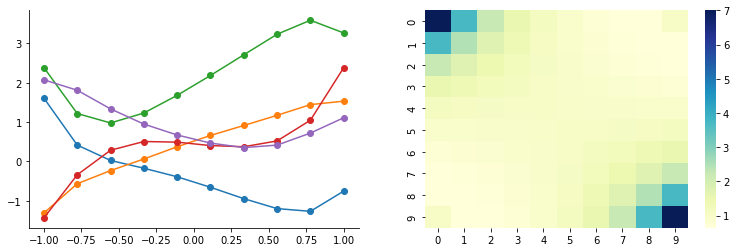

In [4]:
n_sample=10
x=np.linspace(-1,1,n_sample)

seed(314)
#nsteps x degree
phi=PolynomialFeatures(degree=6).fit_transform(x[:,np.newaxis])
#nsteps x nsteps
Phi=(phi@phi.T) #The @ operator can be used as a shorthand for np.matmul on ndarrays
Mean=np.zeros_like(x)

#how many lines x nsteps
gp=np.random.multivariate_normal(Mean,Phi,size=5)

plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(x,gp.T,'o-')
plt.subplot(122)
sns.heatmap(Phi,cmap='YlGnBu')

in the above example, we have 10 samples, which means we have 10 axes along with linspace x values

    x= [-1. , -0.778, -0.556, -0.333, -0.111, 0.111, 0.333, 0.556,  0.778, 1.]
    
at each axis we sample 5 points, e.g. 

    axis x=-1,     sample 5 points
    axis x=-0.778, sample 5 points
    ...
    
we draw 5 functions over all the axes


<AxesSubplot:>

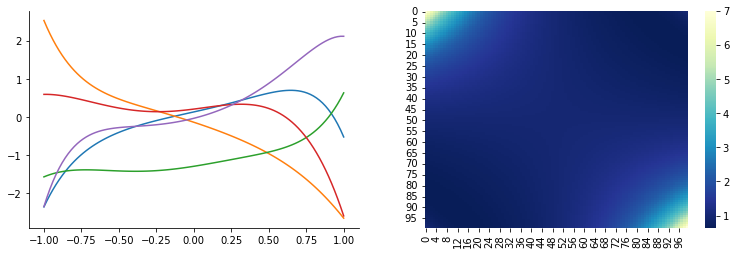

In [5]:
n_sample=100
x=np.linspace(-1,1,n_sample)

seed(314)
#nsteps x degree
phi=PolynomialFeatures(degree=6).fit_transform(x[:,np.newaxis])
#nsteps x nsteps
Phi=(phi@phi.T) #The @ operator can be used as a shorthand for np.matmul on ndarrays
Mean=np.zeros_like(x)

#how many lines x nsteps
gp=np.random.multivariate_normal(Mean,Phi,size=5)

plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(x,gp.T,'-')
plt.subplot(122)
sns.heatmap(Phi,cmap='YlGnBu_r')

in the above case, we have 100 samples, meaning we have 100 axes

the more the samples, the more smoothy the functions

**essentially, gp generate sample along with every training data points** later check

- Gaussian kernel

$k(\textbf{x},\textbf{x'})=\exp (-||\textbf{x}-\textbf{x'}||^2/2\sigma^2)$

In [6]:
print(x.shape, x[:,np.newaxis].shape, x[np.newaxis,:].shape)
print((x[:,np.newaxis]-x[np.newaxis,:]).shape)

(100,) (100, 1) (1, 100)
(100, 100)


<AxesSubplot:>

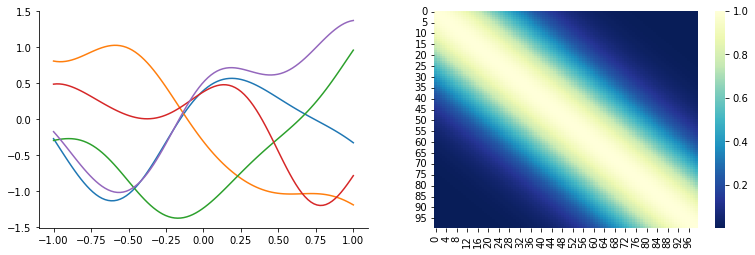

In [7]:
seed(314)

sigma=0.2
Mean=np.zeros_like(x)
K=np.exp(-(x[:,np.newaxis]-x[np.newaxis,:])**2/(2*sigma))

gp=np.random.multivariate_normal(Mean,K,size=5)

plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(x,gp.T,'-')
plt.subplot(122)
sns.heatmap(K,cmap='YlGnBu_r')

- exponential kernel

$k(\textbf{x},\textbf{x'})=\exp(-\theta |\textbf{x}-\textbf{x'}|)$

<AxesSubplot:>

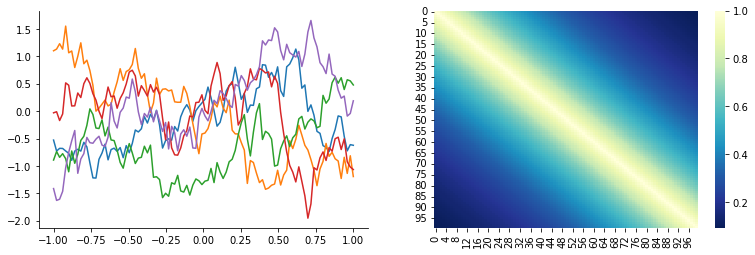

In [8]:
seed(314)

theta=1.2
Mean=np.zeros_like(x)
K=np.exp(-theta*np.abs(x[:,np.newaxis]-x[np.newaxis,:]))

gp=np.random.multivariate_normal(Mean,K,size=5)

plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(x,gp.T,'-')
plt.subplot(122)
sns.heatmap(K,cmap='YlGnBu_r')

# GP for regression

### Sample Generalization

in order to apply GP to regression, we need to consider the noise

$t_n=y_n+\epsilon_n$

$y_n=y(\textbf{x}_n)$

$\epsilon_n$ - a random noise variable whose value is chosen independently for each observation $n$

suppose the noise process is Gaussian

$p(t_n|y_n)=\mathcal{N} (t_n|y_n,\beta^{-1})$

$\beta$ - hyperparameter of precision of the noise

because **the noise is independent for each data point**

the **joint distribution** of the target values $\textbf{t}=(t_1,...,t_N)^T$ 

conditioned on the values of $\textbf{y}=(y_1,...,y_N)^T$ is given by an **isotropic Gaussian**

$p(\textbf{t}|\textbf{y})=\mathcal{N}(\textbf{t}|\textbf{y},\beta^{-1}\textbf{I}_N)$

from the definition of GP, the **marginal** $p(\textbf{y})$ is given by a Gaussian

$p(\textbf{y})=\mathcal{N}(\textbf{y}|\textbf{0,K})$

the kernel function that determines $\textbf{K}$ is typically chosen to express the property, that

**from points $\textbf{x}_n$ and $\textbf{x}_m$ that are similar, the corresponding values $y(\textbf{x}_n)$ and $y(\textbf{x}_m)$ will be more strongly correlated than for dissimilar points**

the **marginal** $p(\textbf{t})$

$p(\textbf{t})=\int p(\textbf{t}|\textbf{y})p(\textbf{y})d\textbf{y}=\mathcal{N}(\textbf{t}|\textbf{0,C})$ <- (by RECALL 2 marginal and conditional gaussian)

where matrix $\textbf{C}$ with elements 

$C(\textbf{x}_n,\textbf{x}_m)=k(\textbf{x}_n,\textbf{x}_m)+\beta^{-1}\delta_{nm}$

note: it shows, the two Gaussian sources of randomness, namely that associated with $y(\textbf{x})$ and that associated with $\epsilon$ are independent and so their covariances simply add

**one widely used kernel for GP**

$k(\textbf{x}_n,\textbf{x}_m)=\theta_0 \exp \{(-\theta_1/2) ||\textbf{x}_n-\textbf{x}_m||^2\}+\theta_2+\theta_3 \textbf{x}_n^T\textbf{x}_m$

$\theta_3 \textbf{x}_n^T\textbf{x}_m$ - parametric model that is a linear function of the input variables

- samples from the above piror for different $[\theta_0,\theta_1,\theta_2, \theta_3]$ 



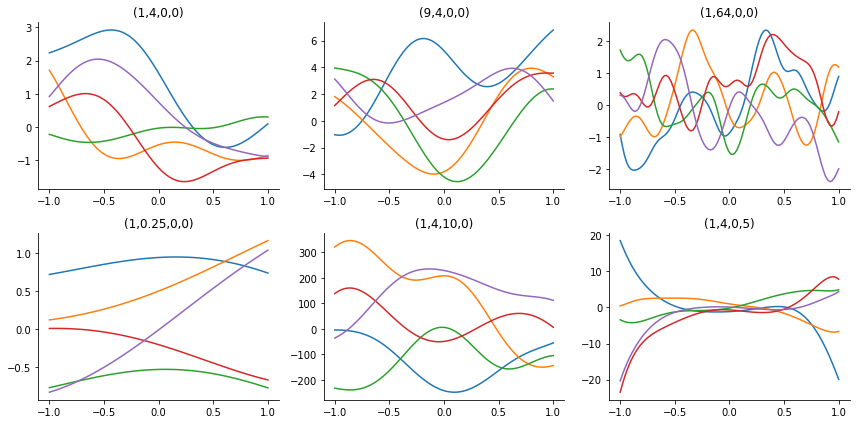

In [9]:
thetas = [(1, 4, 0, 0), (9, 4, 0, 0), (1, 64, 0, 0),
          (1, 0.25, 0, 0), (1, 4, 10, 0), (1, 4, 0, 5)]

seed(1643)

plt.figure(figsize=(12,6))
for i,t in enumerate(thetas):
    plt.subplot(2,3,i+1)
    K=t[0]*np.exp((-t[1]/2)*(x[:,np.newaxis]-x[np.newaxis,:])**2+t[2]+t[3]*x[:,np.newaxis]*x[np.newaxis,:])
    gp=np.random.multivariate_normal(Mean, K, size=5)
    plt.plot(x,gp.T)
    plt.title(f"({t[0]},{t[1]},{t[2]},{t[3]})")
    
plt.tight_layout()

- the following shows a set of points sampled from the joint distribution $p(\textbf{y})=\mathcal{N}(\textbf{y}|\textbf{0,K})$ along with $p(\textbf{t})=\int p(\textbf{t}|\textbf{y})p(\textbf{y})d\textbf{y}=\mathcal{N}(\textbf{t}|\textbf{0,C})$

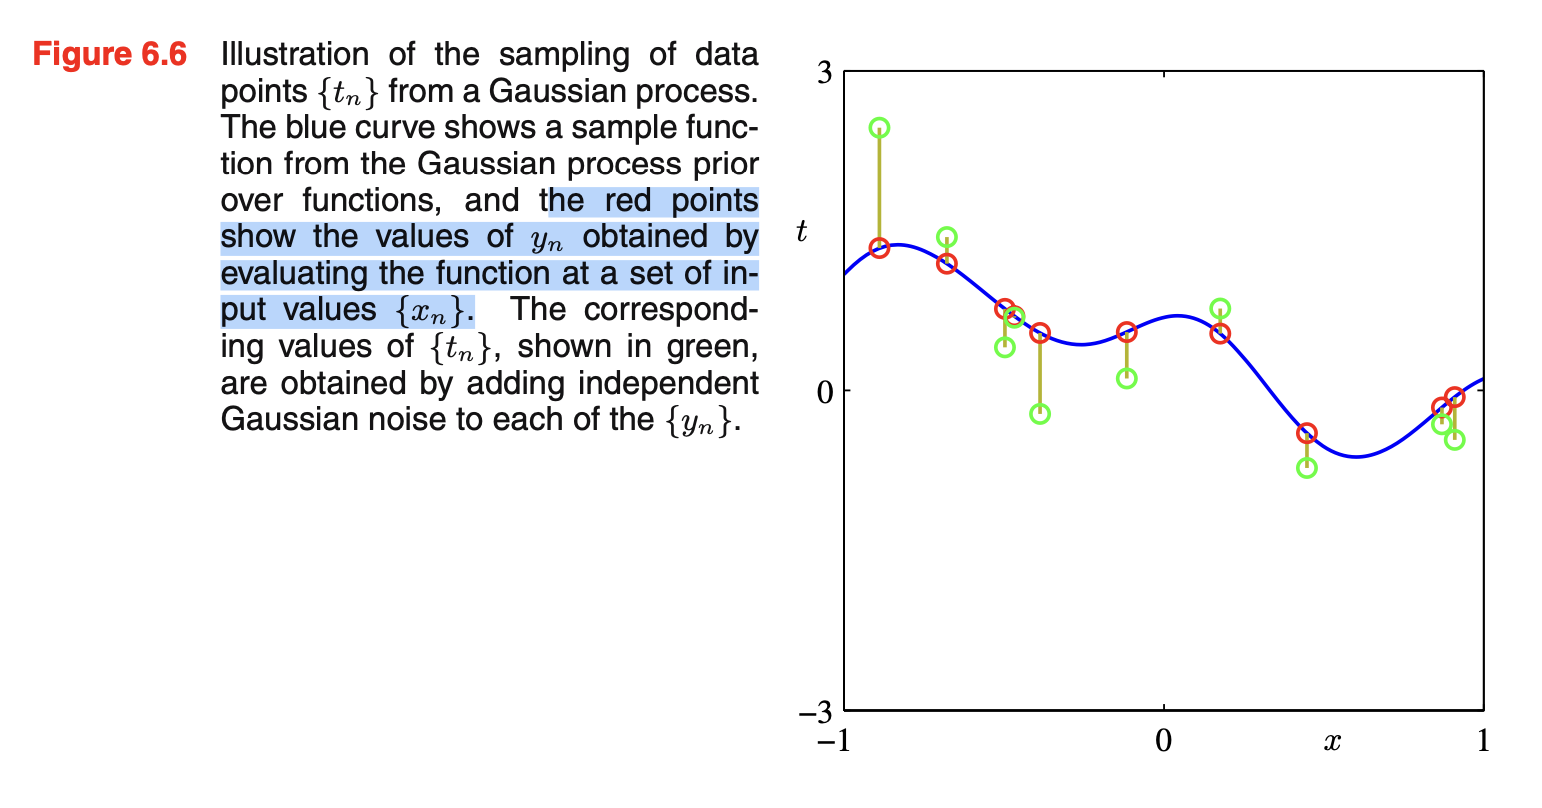

In [10]:
from IPython.display import Image
Image(filename="../input/prmlrelated/Screen Shot 2022-01-16 at 20.26.26.png", width=600)

### For Regression

suppose $\textbf{t}_N=(t_1,...,t_N)^T$

corresponding to input $(\textbf{x}_1,...,\textbf{x}_N)$

Goal: to predict the target variable $t_{N+1}$ for a new input vector $\textbf{x}_{N+1}$

so we need to evaluate the **predictive distribution** $p(t_{N+1}|\textbf{t}_N)$ 

note: the condition $\textbf{x}_1,...,\textbf{x}_{N+1}$ are omitted

we begin with $p(\textbf{t}_{N+1})$

where $\textbf{t}_{N+1}=(t_1,...,t_N,t_{N+1})^T$

from $p(\textbf{t})=\int p(\textbf{t}|\textbf{y})p(\textbf{y})d\textbf{y}=\mathcal{N}(\textbf{t}|\textbf{0,C})$

we have $p(\textbf{t}_{N+1})=\mathcal{N}(\textbf{t}_{N+1}|\textbf{0,C}_{N+1})$

where matrix $\textbf{C}_{N+1}$ is (N+1)x(N+1) with elements $C(\textbf{x}_n,\textbf{x}_m)=k(\textbf{x}_n,\textbf{x}_m)+\beta^{-1}\delta_{nm}$

we partition $\textbf{C}_{N+1}$ to

$\textbf{C}_{N+1}=$

$\begin{pmatrix}
\textbf{C}_N & \textbf{k} \\
\textbf{k}^T & c \\
\end{pmatrix}$

$\textbf{C}_N$ NxN with $C(\textbf{x}_n,\textbf{x}_m)=k(\textbf{x}_n,\textbf{x}_m)+\beta^{-1}\delta_{nm}$ for $n,m=1,...,N$

$\textbf{k}$ with elements $k(\textbf{x}_n,\textbf{x}_{N+1})$ for $n=1,...,N$

$c=k(\textbf{x}_{N+1},\textbf{x}_{N+1})+\beta^{-1}$

using properties of conditional Gaussian distribution (section 2.3.1)

we see $p(t_{N+1}|\textbf{t})$ is a Gaussian with mean and variance

$m(\textbf{x}_{N+1})=\textbf{k}^T\textbf{C}_N^{-1}\textbf{t}$

$\sigma^2(\textbf{x}_{N+1})=c-\textbf{k}^T\textbf{C}_N^{-1}\textbf{k}$

where $\textbf{k}$ contains the element of $\textbf{x}_{N+1}$

note: the only restriction is $C(\textbf{x}_n,\textbf{x}_m)$ must be positive definite

note: $m(\textbf{x}_{N+1})=\textbf{k}^T\textbf{C}_N^{-1}\textbf{t}$ can be written as 

$m(\textbf{x}_{N+1})=\sum_{n=1}^N a_n k(\textbf{x}_n,\textbf{x}_{N+1})$

$a_n$ - the nth component of $\textbf{C}_N^{-1}\textbf{t}$

thus if the kernel function depends only on the distance $||\textbf{x}_n-\textbf{x}_m||$, then we obtain an expansion in rbfs

now, the predictive distribution either can be taken by **a parameter space viewpoint** using linear regression results, or by **a function space viewpoint** using gp result

- recall the regression problem

x_train (10,1), y_train (10,)

x_text (100,1), y_test (100,)

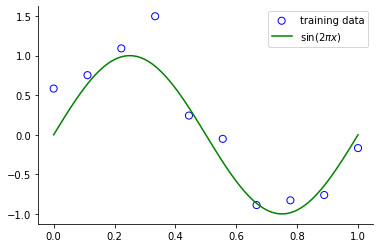

In [11]:
x=np.linspace(0,1,10) #sample size=10

#std 0.25
t=np.sin(2*np.pi*x)+np.random.normal(scale=0.25,size=x.shape)

x_train,y_train=x,t

x_test=np.linspace(0,1,100)
y_test=np.sin(2*np.pi*x_test)

plt.scatter(x_train,y_train,facecolor='none',edgecolor='b',s=50,label='training data')
plt.plot(x_test,y_test,c='g',label='$\sin(2\pi x)$')
plt.legend()

prior: $p(\textbf{y})=\mathcal{N}(\textbf{y}|\textbf{0,K})$

$\textbf{K}$ <- Gaussian kernel

$k(\textbf{x},\textbf{x'})=\exp (-||\textbf{x}-\textbf{x'}||^2/2\sigma^2)$

In [12]:
#Gaussian kernel 
sigma=0.01
mu_prior=np.zeros_like(x_test)
k_prior=np.exp(-(x_test[:,np.newaxis]-x_test[np.newaxis,:])**2/(2*sigma))

posterior: $p(\textbf{t})=\mathcal{N}(\textbf{t}|\textbf{0,C}_N)$

$\textbf{C}_N=\beta^{-1}\textbf{I}_N+\textbf{K}_N$

$N$ - dimension of training data

In [13]:
beta_inv=0.01
C_N=np.eye(len(x_train))*beta_inv+np.exp(-(x_train[:,np.newaxis]-x_train[np.newaxis,:])**2/(2*sigma))

observing $N$ training points $\textbf{X}_N$ of the target vector $\textbf{t}_N$

further $L$ test points as new inputs are $\textbf{X}_{L}$ of the target vector $\textbf{t}_L$

$p(\textbf{t}_L|\textbf{t}_N,\textbf{X}_N,\textbf{X}_{L})=\mathcal{N}(\textbf{t}_L|\textbf{M}_{N+L},\textbf{C}_{N+L})$

$\textbf{M}_{N+L}=\textbf{k}_{NL}^T\textbf{C}_N^{-1}\textbf{t}_N$

$\textbf{C}_{N+L}=\textbf{k}_L-\textbf{k}_{NL}^T\textbf{C}_N^{-1}\textbf{k}_{NL}$

$p(\textbf{t}_L|\textbf{t}_N,\textbf{X}_N,\textbf{X}_{L})=\mathcal{N}(\textbf{t}_L|\textbf{k}_{NL}^T\textbf{C}_N^{-1}\textbf{t}_N,\textbf{k}_L-\textbf{k}_{NL}^T\textbf{C}_N^{-1}\textbf{k}_{NL})$

In [14]:
#x_train(10,1),x_text(1,100)
#x_train[:,np.newaxis]-x_test[np.newaxis,:] <- (10,100)
K_NL=np.exp(-(x_train[:,np.newaxis]-x_test[np.newaxis,:])**2/(2*sigma))
K_L=np.exp(-(x_test[:,np.newaxis]-x_test[np.newaxis,:])**2/(2*sigma))

mu_post=K_NL.T@inv(C_N)@y_train
sigma_post=K_L-K_NL.T@inv(C_N)@K_NL


mu_post.shape,sigma_post.shape,mu_post.ravel().shape

((100,), (100, 100), (100,))

Text(0.5, 1.0, 'Posterior Samples')

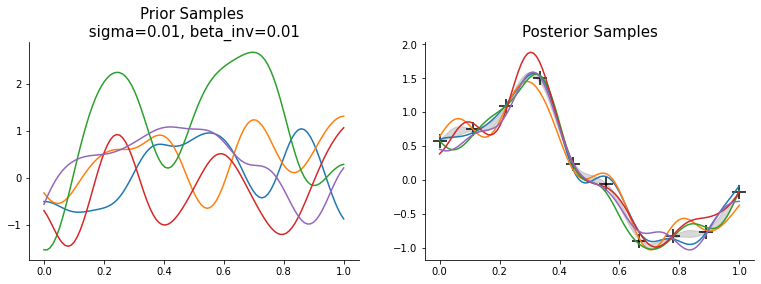

In [15]:
seed(314)

posterior_sample=np.random.multivariate_normal(mu_post, sigma_post, size=5)
prior_sample=np.random.multivariate_normal(mu_prior, k_prior, size=5)

plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(x_test,prior_sample.T)
plt.title('Prior Samples \n sigma=0.01, beta_inv=0.01 ',fontsize=15)
plt.subplot(122)
upper_bound=mu_post.ravel() + 2 * np.diag(sigma_post)
lower_bound = mu_post.ravel() - 2 * np.diag(sigma_post)
plt.fill_between(x_test, upper_bound, lower_bound, color="tab:gray", alpha=0.3)
plt.plot(x_test,posterior_sample.T)
plt.scatter(x_train,y_train,marker='+',s=200, c="black")
plt.title('Posterior Samples',fontsize=15)

In [16]:
def gp_regression(x_train,y_train,x_test,y_test,sigma,beta_inv,sample_size=5,figure_on=True):

    mu_prior=np.zeros_like(x_test)
    k_prior=np.exp(-(x_test[:,np.newaxis]-x_test[np.newaxis,:])**2/(2*sigma))

    C_N=np.eye(len(x_train))*beta_inv+np.exp(-(x_train[:,np.newaxis]-x_train[np.newaxis,:])**2/(2*sigma))
    K_NL=np.exp(-(x_train[:,np.newaxis]-x_test[np.newaxis,:])**2/(2*sigma))
    K_L=np.exp(-(x_test[:,np.newaxis]-x_test[np.newaxis,:])**2/(2*sigma))

    mu_post=K_NL.T@inv(C_N)@y_train
    sigma_post=K_L-K_NL.T@inv(C_N)@K_NL

    seed(314)

    posterior_sample=np.random.multivariate_normal(mu_post.ravel(), sigma_post, size=sample_size)
    prior_sample=np.random.multivariate_normal(mu_prior, k_prior, size=sample_size)

    if figure_on:
        plt.figure(figsize=(13,8))
        plt.subplot(221)
        plt.plot(x_test,prior_sample.T)
        plt.title('Prior Samples \n sigma,beta_inv'+f"({sigma},{beta_inv})",fontsize=15)
        plt.subplot(222)
        plt.plot(x_test,posterior_sample.T)
        plt.scatter(x_train,y_train,marker='+',s=200, c="black")
        plt.title('Posterior Samples',fontsize=15)
        plt.subplot(223)
        upper_bound=mu_post.ravel() + 2 * np.diag(sigma_post)
        lower_bound = mu_post.ravel() - 2 * np.diag(sigma_post)
        plt.fill_between(x_test, upper_bound, lower_bound, color="tab:gray", alpha=0.3,label='std')
        plt.plot(x_test,mu_post.ravel(),'r',label='posterior mean')
        plt.scatter(x_train,y_train,marker='+',s=200, c="black",label='training sample')
        if y_test is not None:
            plt.plot(x_test,y_test,c='g',label='original')
        plt.legend()
        plt.title('Posterior Mean',fontsize=15)
        plt.subplot(224)
        sns.heatmap(sigma_post,cmap='YlGnBu_r')
        plt.title('Posterior Sigma',fontsize=15)
    
    return mu_post.ravel(), sigma_post

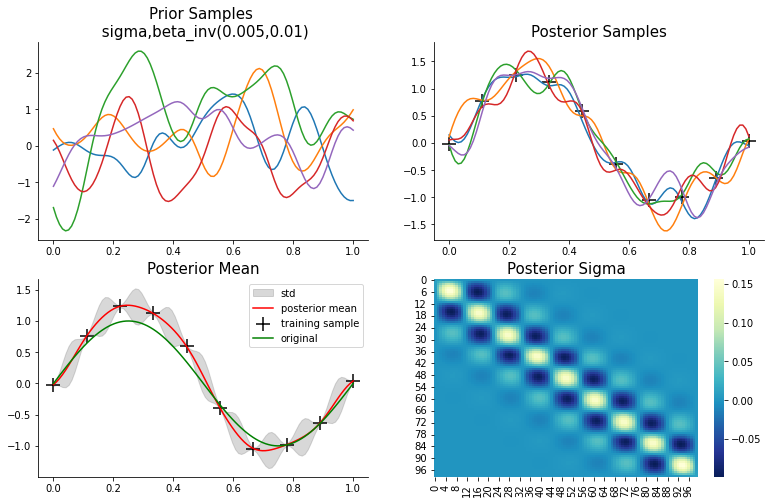

In [17]:
sigma=0.005
beta_inv=0.01
x=np.linspace(0,1,10) #sample size=10
#std 0.25
t=np.sin(2*np.pi*x)+np.random.normal(scale=0.25,size=x.shape)

x_train,y_train=x,t
x_test=np.linspace(0,1,100)
y_test=np.sin(2*np.pi*x_test)
    
mu_post,sigma_post=gp_regression(x_train,y_train,x_test,y_test,sigma,beta_inv)

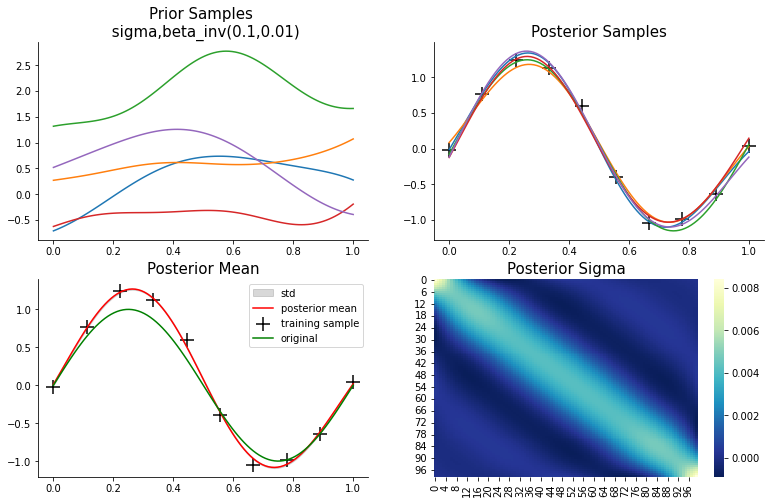

In [18]:
sigma=0.1
beta_inv=0.01
#x=np.linspace(0,1,10) #sample size=10
#std 0.25
#t=np.sin(2*np.pi*x)+np.random.normal(scale=0.25,size=x.shape)

#x_train,y_train=x,t
#x_test=np.linspace(0,1,100)
#y_test=np.sin(2*np.pi*x_test)
    
mu_post,sigma_post=gp_regression(x_train,y_train,x_test,y_test,sigma,beta_inv)

# GP Recap

### function-space view

**Def**: a Gaussian Process is a collection of random variables, any finite number of which have a **joint Gaussian distribution**, written as:

$f(\textbf{x}) \sim \mathcal{GP} (m(\textbf{x}),k(\textbf{x},\textbf{x'}))$

GP is completely specified by its **mean** and **positive definite covariance** (kernal) function:

$m(\textbf{x})=\mathbb{E}[y(\textbf{x})]$

$k(\textbf{x},\textbf{x'})=\mathbb{E}[(y(\textbf{x})-m(\textbf{x}))(y(\textbf{x'})-m(\textbf{x'}))^T]$

each input is a variable correlated with the other variables in the input domain, as defined by the covariance function

### kernel in linear case

suppose the prior function is determined by a linear model

$y(\textbf{x},\textbf{w})=\sum_{j=0}^{M-1}w_j\phi_j(\textbf{x})=\textbf{w}^T\boldsymbol{\phi}(\textbf{x})=\boldsymbol{\Phi}\textbf{w}$

induced by a weight prior $\textbf{w} \sim \mathcal{N}(\textbf{0},\alpha^{-1}\textbf{I})$, then

$m(\textbf{x})=\mathbb{E}[y(\textbf{x})]=\mathbb{E}[\boldsymbol{\Phi}\textbf{w}]=\boldsymbol{\Phi}\mathbb{E}[\textbf{w}]=\textbf{0}$

$k(\textbf{x},\textbf{x'})=\mathbb{E}[(y(\textbf{x})-m(\textbf{x}))(y(\textbf{x'})-m(\textbf{x'}))^T]=\mathbb{E}[(\boldsymbol{\Phi}\textbf{w})(\boldsymbol{\Phi}\textbf{w})^T]=\mathbb{E}[\boldsymbol{\Phi}\textbf{w}\textbf{w}^T\boldsymbol{\Phi}^T]=\alpha^{-1}\boldsymbol{\Phi\Phi}^T$

hence

$y(\textbf{x}) \sim \mathcal{GP} (\textbf{0},\alpha^{-1}\boldsymbol{\Phi\Phi}^T)$

### kernel can be defined directly

instead of through a basis function, but have to follow some properties as shown before

Gaussian kernel, Exponential kernel, Fisher kernel, ..., or **one widely used kernel function**

### prior and posterior GP

**prior**: $p(\textbf{y})=\mathcal{N}(\textbf{y}|\textbf{0,K})$

$\textbf{K}$ can be Gaussian kernel like $k(\textbf{x},\textbf{x'})=\exp (-||\textbf{x}-\textbf{x'}||^2/2\sigma^2)$

**posterior**: $p(\textbf{t})=\mathcal{N}(\textbf{t}|\textbf{0,C}_N)=\mathcal{N}(\textbf{t}|\beta^{-1}\textbf{I}_N+\textbf{K}_N)$

$N$ can be dimension of training data

**the predictive distribution**: $p(\textbf{t}_L|\textbf{t}_N,\textbf{X}_N,\textbf{X}_{L})$ after observing training points $\textbf{X}_N$ of the target vector $\textbf{t}_N$ with further $L$ test points as new inputs $\textbf{X}_{L}$ of the target vector $\textbf{t}_L$

$p(\textbf{t}_L|\textbf{t}_N,\textbf{X}_N,\textbf{X}_{L})=\mathcal{N}(\textbf{t}_L|\textbf{k}_{NL}^T\textbf{C}_N^{-1}\textbf{t}_N,\textbf{k}_L-\textbf{k}_{NL}^T\textbf{C}_N^{-1}\textbf{k}_{NL})$

### takeaway notes

- a Gaussian Process (GP) is **a generalization of the Gaussian probability distribution**

- GPs **asign a prior probability over functions**. The speciﬁcation of the prior is important, because it ﬁxes the properties of the functions considered for inference

- the properties of a GP are induced by **the covariance function** of the process

- since functions can have an infinite input domain, GP can also be interpreted as an infinite dimensional Gaussian random variable

- GP is a process to sample functions with mean and cov pre-set, cov is simply a kernel

- every finite set of GP is a multivariate Gaussian

- the posterior predictions of a GP are weighted averages of the observed data where the weighting is based on the cov and mean functions

# RECALL 1 - dimensionality of Bayesian regression

Given $N$ observation 

$\textbf{x} \equiv (x_1,...,x_N)^T$ <- Nx1

$\textbf{t} \equiv (t_1,...,t_N)^T$ <- Nx1

Goal: exploit the training set to make predictions of $\hat{t}$ for some new $\hat{x}$

recall: $y(\textbf{x},\textbf{w})=\sum_{j=0}^{M-1}w_j\phi_j(\textbf{x})=\textbf{w}^T\boldsymbol{\phi}(\textbf{x})$

$\textbf{w}=(w_0,...,w_{M-1})^T$ <- Mx1

$\boldsymbol{\phi}=(\phi_0,...,\phi_{M-1})^T$ <- Mx1

**sum of square error**

$E_D(\textbf{w})=1/2 \sum_{n=1}^N \{t_n- \textbf{w}^T\boldsymbol{\phi}(\textbf{x}_n)\}^2$ - sum-of-squares error

$\textbf{w}^T\boldsymbol{\phi}(\textbf{x}_n)=w_0 \phi_0(x_n)+...+w_{M-1}\phi_{M-1}(x_n)$ 

1xM Mx1

**maximum likelihood estimate**

$\textbf{w}_{ML}=(\Phi^T\Phi)^{-1}\Phi^T\textbf{t}$

Mx1 = MxN NxM MxN Nx1

$\Phi=$ 

$\begin{pmatrix}
\phi_0(x_1) & \phi_1(x_1) & ... & \phi_{M-1}(x_1)\\
\phi_0(x_2) & \phi_1(x_2) & ... & \phi_{M-1}(x_2)\\
... & ... & ... & ...\\
\phi_0(x_N) & \phi_1(x_N) & ... & \phi_{M-1}(x_N)\\
\end{pmatrix}$

$\Phi$ <- design matrix, NxM, $\Phi_{nj}=\phi_j(x_n)$

take the gradient of **log likelihood** w.r.t $\beta$

$1/\beta_{ML}=1/N \sum_{n=1}^N \{t_n-\textbf{w}_{ML}^T \phi(\textbf{x}_n) \}$ 

$\textbf{w}_{ML}^T \phi(\textbf{x}_n)$ <- 1xM Mx1

**Bayesian regression**

**prior**: $p(\textbf{w}|\alpha)=\mathcal{N}(\textbf{w}|\textbf{0},\alpha^{-1}\textbf{I})=\left(\frac{\alpha}{2\pi} \right)^{(M+1)/2} \exp \{-\alpha/2 \textbf{w}^T\textbf{w}\}$ <- multivariate Gaussian

**likelihood**: $p(\textbf{t}|\textbf{x},\textbf{w},\beta)=\prod_{n=1}^N \mathcal{N}(t_n|y(x_n,\textbf{w}),\beta^{-1})$

by **Bayes Rule**

**posterior** for $\textbf{w}$: $p(\textbf{w}|\textbf{x},\textbf{t},\alpha,\beta) \propto p(\textbf{t}|\textbf{x},\textbf{w},\beta) p(\textbf{w}|\alpha)$

for curve fitting, we want to evaluate the **predictive distribution**: $p(t|x,\textbf{x},\textbf{t})$

by sum and product rule:

$p(t|x,\textbf{x},\textbf{t})=\int p(t|x,\textbf{w})p(\textbf{w}|\textbf{x},\textbf{t})d\textbf{w}$ <- integral likelihood x  posterior

likelihood: $p(t|x,\textbf{w})=p(t|x,\textbf{w},\beta)=\mathcal{N}(t|y(x,\textbf{w}),\beta^{-1})$

posterior: $p(\textbf{w}|\textbf{x},\textbf{t})$ <- normalize $p(\textbf{t}|\textbf{x},\textbf{w},\beta) p(\textbf{w}|\alpha)$

since both $p(t|x,\textbf{w})$ and $p(\textbf{w}|\textbf{x},\textbf{t})$ are Gaussian

the predictive distribution is Gaussian (solved analytically)

$p(t|x,\textbf{x},\textbf{t})=\mathcal{N}(t|m(x),s^2(x))$

$m(x)$ - mean of the predicted target

$s^2(x)$ - variance of the predicted target

$\textbf{S}$ - variance of the weights

$\textbf{S}^{-1}=\alpha \textbf{I}+\beta\sum_{n=1}^N \phi(x_n)\phi(x)^T$

$= \alpha \textbf{I} + \beta \Phi^T \Phi$

MxM + MxN NxM

$\textbf{M}$ - mean of the weigths

$\textbf{M}=\beta \textbf{S}\sum_{n=1}^N \phi(x_n)t_n$

$= \beta \textbf{S} \Phi^T \textbf{t}$

MxM MxN Nx1

$m(x)=\beta \phi(x)^T \textbf{S}\sum_{n=1}^N \phi(x_n)t_n=\beta \Phi \textbf{S} \Phi^T \textbf{t}$

$=\beta \Phi \textbf{M}$

NxM Mx1

$s^2(x)=\beta^{-1}+\phi(x)^T\textbf{S}\phi(x)$

$=\beta^{-1}+\Phi\textbf{S}\Phi^T$

NxM MxM MxN

# RECALL 2 - marginal and conditional Gaussians

prml eq(2.115)

Given: the marginal Gaussian $p(\textbf{x})$ and the conditional Gaussian $p(\textbf{y}|\textbf{x})$

$p(\textbf{x})=\mathcal{N}(\textbf{x}|\boldsymbol{\mu},\boldsymbol{\Lambda}^{-1})$

$p(\textbf{y}|\textbf{x})=\mathcal{N}(\textbf{y}|\textbf{Ax+b},\textbf{L}^{-1})$

then the marginal Gaussian $p(\textbf{y})$ and the conditional Gaussian $p(\textbf{x}|\textbf{y})$

$p(\textbf{y})=\mathcal{N}(\textbf{x}|\textbf{A}\boldsymbol{\mu}+\textbf{b},\textbf{L}^{-1}+\textbf{A}\boldsymbol{\Lambda}^{-1}\textbf{A}^T)$

$p(\textbf{x}|\textbf{y})=\mathcal{N}(\textbf{x}|\boldsymbol{\Sigma}\left[\textbf{A}^T\textbf{L(y-b)}+\boldsymbol{\Lambda\mu}\right],\boldsymbol{\Sigma})$

where $\boldsymbol{\Sigma}=(\boldsymbol{\Lambda}+\textbf{A}^T\textbf{LA})^{-1}$

# SUP 1 - stochastic process

**Stochastic processes** typically describe systems randomly changing over time

The processes are stochastic due to the uncertainty in the system

Even if the starting point is known, there are several directions in which the processes can evolve

- Brownian motion

It is the random motion of particles suspended in a fluid

It can be seen as a continuous random walk where a particle moves around in the fluid due to other particles randomly bumping into it 

Let's simulate this process over time $t$ in 1d distance $d$ starting from position 0

the particle is moving in $\Delta t$ with a random distance $\Delta d$

$\Delta d \sim \mathcal{N} (0,\Delta t)$

Text(0, 0.5, 'total d')

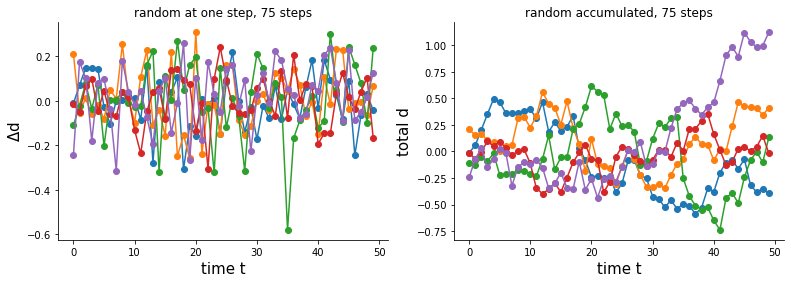

In [19]:
T=1
n_steps=50
dt=T/n_steps
n_process=5

mu=0
std=np.sqrt(dt)

#(5,75)
random_at_a_step=np.random.normal(mu,std,size=(n_process,n_steps))
#(5,75) accumulate along x axes
random_accumulated=np.cumsum(random_at_a_step,axis=1)

plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(random_at_a_step.T,'o-')
plt.title('random at one step, 75 steps')
plt.xlabel('time t',fontsize=15)
plt.ylabel('$\Delta$d',fontsize=15)
plt.subplot(122)
plt.plot(random_accumulated.T,'o-')
plt.title('random accumulated, 75 steps')
plt.xlabel('time t',fontsize=15)
plt.ylabel('total d',fontsize=15)

from above, we have 5 trajectories starting from one position

in fact, each trajectory is a function of time $f(t)=d$

**this means a stochastic process can be interpreted as a random distribution over functions**

we can sample a realization of a function from a stochastic process

note: each realized function can be different due to the randomness of the stochastic process



# SUP 2 - regression with no y_test

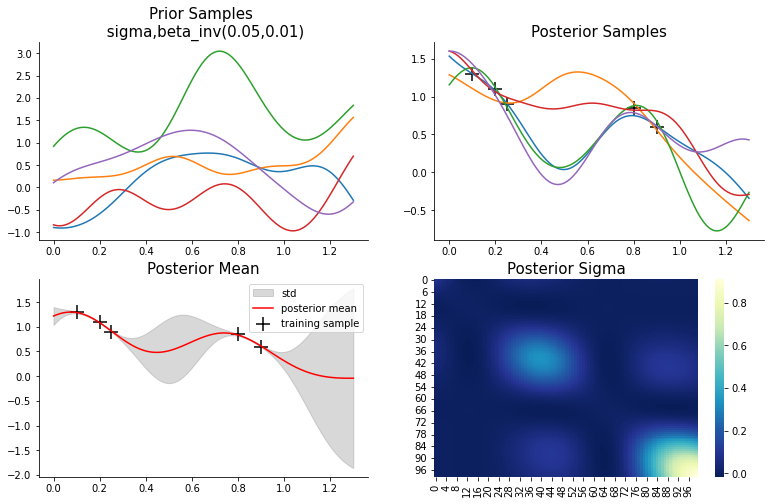

In [20]:
# test for regression

seed(1643)
#Gaussian kernel 
sigma=0.05
beta_inv=0.01

x_test=np.linspace(0, 1.3, 100)
x_train=np.array([0.1, 0.2, 0.25, 0.8, 0.9])
y_train=np.array([1.3, 1.1, 0.9, 0.85, 0.6])[:, np.newaxis]

mu_post,sigma_post=gp_regression(x_train,y_train,x_test,None,sigma,beta_inv)

# SUP 3 - GP sampling

In [21]:
#(41,) -> (41,1)
#np.linspace(-4, 4, n_sample).shape, np.expand_dims(np.linspace(-4, 4, n_sample),1).shape

#same as 

#X=np.linspace(-4, 4, n_sample)
#X=X[:,np.newaxis]

#same as 

#X=np.linspace(-4, 4, n_sample)
#X=X.reshape(-1,1)
#X.shape

- sample 41 points by Gaussian kernel

Text(0, 0.5, 'f(x)')

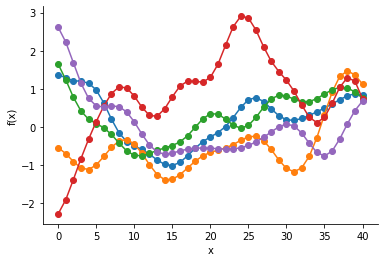

In [22]:
n_sample=41
n_f=5
sigma=0.5

X=np.linspace(-4, 4, n_sample)
M=np.zeros_like(X)
X=X.reshape(-1,1)
K=np.exp(-(X-X.T)**2/(2*sigma))

fs=np.random.multivariate_normal(M,K,size=n_f)

plt.plot(fs.T,'o-')
plt.xlabel('x')
plt.ylabel('f(x)')

- to plot 2d marginal

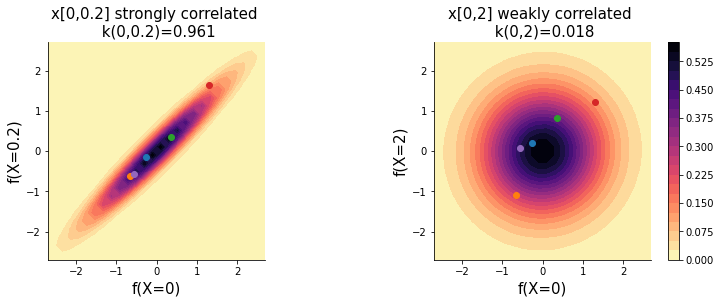

In [23]:
from scipy.stats import multivariate_normal
import matplotlib.gridspec as gridspec

#50 is the resolution
reso=50
x1=np.linspace(-5,5,num=reso)
x2=np.linspace(-5,5,num=reso)
x1,x2=np.meshgrid(x1,x2)
pdf=np.zeros((reso,reso))

X_strong=np.array([[0],[0.2]])
mu=np.array([0,0])
cov=np.exp(-(X_strong-X_strong.T)**2/(2*sigma))

for i in range(reso):
    for j in range(reso):
        pdf[i,j]=multivariate_normal.pdf(np.array([x1[i,j],x2[i,j]]),mu,cov)
        
gs=gridspec.GridSpec(1,2)
plt.figure(figsize=(13, 4)) 
ax1=plt.subplot(gs[0,0])
ax2=plt.subplot(gs[0,1],sharex=ax1,sharey=ax1)

con1=ax1.contourf(x1,x2,pdf,25,cmap='magma_r')
ax1.set_title('x[0,0.2] strongly correlated \n k(0,0.2)=0.961',fontsize=15)
ax1.set_xlabel('f(X=0)',fontsize=15)
ax1.set_ylabel('f(X=0.2)',fontsize=15)
ax1.axis([-2.7, 2.7, -2.7, 2.7])
ax1.set_aspect('equal')

X_0_idx,X_02_idx=np.where(np.isclose(X, 0.))[0][0],np.where(np.isclose(X, 0.2))[0][0]
y_strong=fs[:,[X_0_idx,X_02_idx]]

for i in range(y_strong.shape[0]):
    ax1.plot(y_strong[i,0],y_strong[i,1],'o')
    
X_weak=np.array([[0],[2]])
mu=np.array([0,0])
cov=np.exp(-(X_weak-X_weak.T)**2/(2*sigma))

for i in range(reso):
    for j in range(reso):
        pdf[i,j]=multivariate_normal.pdf(np.array([x1[i,j],x2[i,j]]),mu,cov)
        

con2=ax2.contourf(x1,x2,pdf,25,cmap='magma_r')
ax2.set_title('x[0,2] weakly correlated \n k(0,2)=0.018',fontsize=15)
ax2.set_xlabel('f(X=0)',fontsize=15)
ax2.set_ylabel('f(X=2)',fontsize=15)
ax2.axis([-2.7, 2.7, -2.7, 2.7])
ax2.set_aspect('equal')

X_0_idx,X_2_idx=np.where(np.isclose(X, 0.))[0][0],np.where(np.isclose(X, 2))[0][0]
y_weak=fs[:,[X_0_idx,X_2_idx]]

for i in range(y_weak.shape[0]):
    ax2.plot(y_weak[i,0],y_weak[i,1],'o')
    
plt.colorbar(con1, ax=ax2)

    X: 41x1,  mu: 41x1, cov: 41x41
    
    generate ys: 5x41   x axis:[-4,...0,...,0.2,...,2,...,4]
    
    X_strong: [0  ], mu_strong: [0], cov_strong: [1,0.961],
              [0.2]             [0]              [0.961,1]
              
    y_strong: [-0.259, -0.146],
              [-0.663, -0.607],
              [ 0.349,  0.34 ],
              [ 1.302,  1.646],
              [-0.556, -0.568]
                  |       |
                x=0  ,  x=0.2
                
**if 2 points in X is strongly correlated, then y of these two are also strongly correlated**

this is because these marginals come from a GP with prior of the Gaussian kernel, which adds prior information that points close to each other in the input space $X$ must be close to each other in the output space $y$ 

# SUP 4 - fitting 2 sine waves

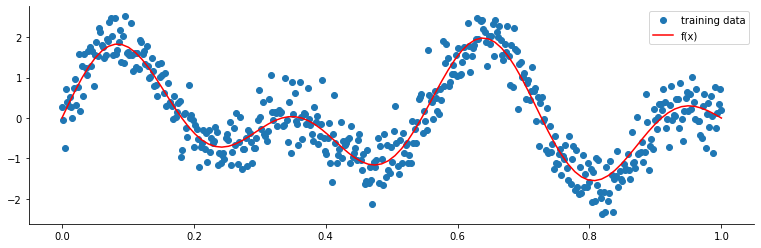

In [24]:
n_train=500
x_train=np.linspace(0,1,n_train)
y_train=np.sin((4*np.pi)*x_train) + np.sin((7*np.pi)*x_train)+np.random.normal(0, 0.4, size=n_train)

#ground truth
x=np.linspace(0,1,100)
y=np.sin((4*np.pi)*x) + np.sin((7*np.pi)*x)

#test data
n_test=100
x_test=np.linspace(0,1,n_test)

plt.figure(figsize=(13,4))
plt.plot(x_train,y_train,'o',label='training data')
plt.plot(x,y,'r-',label='f(x)')
plt.legend()

In [25]:
x_train.shape

(500,)

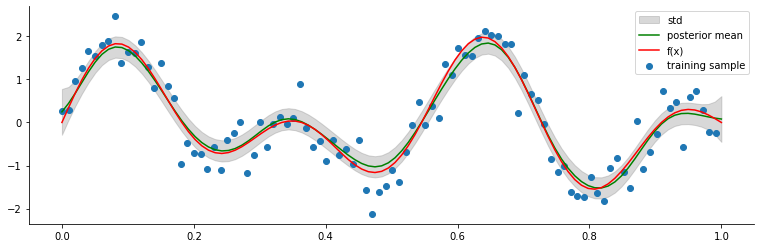

In [26]:
sigma=0.002
beta_inv=4
mu_post,sigma_post=gp_regression(x_train,y_train,x_test,None,sigma,beta_inv,figure_on=False)

plt.figure(figsize=(13,4))
upper_bound=mu_post.ravel() + 2 * np.diag(sigma_post)
lower_bound = mu_post.ravel() - 2 * np.diag(sigma_post)
plt.fill_between(x_test, upper_bound, lower_bound, color="tab:gray", alpha=0.3,label='std')
plt.plot(x_test,mu_post.ravel(),'g',label='posterior mean')
plt.plot(x,y,'r-',label='f(x)')
plt.scatter(x_train[::5],y_train[::5],marker='o',label='training sample')

plt.legend()

- using sklearn

In [27]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

sigma_n=0.4
l=0.1
sigma_f=2

d=1#dimension
#training set

kernel = ConstantKernel(constant_value=sigma_f,constant_value_bounds=(1e-3, 1e3)) \
            * RBF(length_scale=l, length_scale_bounds=(1e-3, 1e3))

gp = GaussianProcessRegressor(kernel=kernel, alpha=sigma_n**2, n_restarts_optimizer=10)
gp.fit(x_train.reshape(n_train,d),y_train)

y_pred=gp.predict(x_test.reshape(n_test,d))

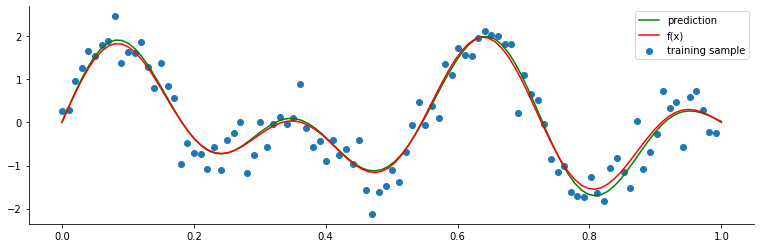

In [28]:
plt.figure(figsize=(13,4))
plt.plot(x_test,y_pred,'g',label='prediction')
plt.plot(x,y,'r-',label='f(x)')
plt.scatter(x_train[::5],y_train[::5],marker='o',label='training sample')
plt.legend()

ref:

https://www.analyticsvidhya.com/blog/2021/07/deep-understanding-of-discriminative-and-generative-models-in-machine-learning/

https://github.com/gerdm/prml

https://github.com/gerdm/prml/blob/master/chapter06/gaussian-processes.ipynb

https://peterroelants.github.io/posts/gaussian-process-tutorial/

https://juanitorduz.github.io/gaussian_process_reg/

gp with gradients

https://www.linuxtut.com/en/4c4607edf15072cddc46/

later check:

https://blog.dominodatalab.com/fitting-gaussian-process-models-python

https://towardsdatascience.com/implement-a-gaussian-process-from-scratch-2a074a470bce

https://scikit-learn.org/stable/modules/gaussian_process.html